# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import seaborn as sn
plt.style.use('seaborn-white')
%matplotlib notebook

Cleaning Instructions:
1. Get a single DataFrame with years 1926 - 2019
2. Delete unnecessary columns and rearrange to ['Finish','GP', 'W', 'L', 'T', 'OTL', 'Pts', 'GF', 'GA']
    for regular season only.
3. Clean up any missing data, clean any text ([],(),etc..), Decide what to do with '-', any NaNs? 
4. Are Conference and Division important?


 Finish:  Final position in division or league standings  
 GA:      Goals against (goals scored by the Rangers' opponents)  
 GF:      Goals for (goals scored by the Rangers)  
 GP:      Number of games played  
 L:       Number of losses  
 OT:      Number of losses in overtime (since the 1999–2000 season)  
 Pts:     Number of point  

In [2]:
#Moving Average window size
window=10
int_cols=['Finish', 'GP', 'W', 'L', 'Pts', 'GF', 'GA', 'Year']

In [3]:
detroit=pd.read_html('https://en.wikipedia.org/wiki/List_of_Detroit_Red_Wings_seasons')
detroit=detroit[2].iloc[:93].reset_index(drop=True)
detroit=detroit.T
detroit_regular=detroit.loc['Regular season[3][6][7][8]'].T
detroit_regular['Year']=detroit.T[('NHL season', 'NHL season')].str.slice(stop=4)
detroit_regular['Finish']=detroit_regular['Finish'].str.slice(stop=1)
detroit_regular=detroit_regular.drop(columns=['T', 'OT'])
detroit_regular=detroit_regular.replace({'—' : np.nan}).dropna().astype(int)
detroit_regular['MA'] = detroit_regular['Pts'].rolling(window=window).mean()
detroit_regular['Win PC']=(detroit_regular['W']/detroit_regular['GP'])*100

detroit_post=detroit.loc['Postseason'].T
detroit_post['Year']=detroit.T[('NHL season', 'NHL season')].str.slice(stop=4)

In [4]:
#extra tables before main table, no conference column, finish is last column
montreal=pd.read_html('https://en.wikipedia.org/wiki/List_of_Montreal_Canadiens_seasons')
montreal=montreal[3].append(montreal[4]).reset_index(drop=True)
montreal=montreal.iloc[13:107].drop(54, axis=0).reset_index(drop=True)
montreal=montreal.T
montreal_regular=montreal.loc['Regular season[9]'].T
montreal_regular['Year']=montreal.T[('Canadiens season', 'Canadiens season')].str.slice(stop=4)
montreal_regular['Finish']=montreal_regular['Finish'].str.slice(stop=1)
montreal_regular=montreal_regular.drop(columns=['T', 'OT'])
montreal_regular=montreal_regular.replace({'—' : np.nan}).dropna().astype(int)
montreal_post=montreal.loc['Postseason'].T
montreal_regular['MA'] = montreal_regular['Pts'].rolling(window=window).mean()
montreal_regular['Win PC']=(montreal_regular['W']/montreal_regular['GP'])*100

montreal_post['Year']=montreal.T[('Canadiens season', 'Canadiens season')].str.slice(stop=4)
montreal_post=montreal_post.drop(columns=['Unnamed: 19_level_1'])

In [5]:
boston=pd.read_html('https://en.wikipedia.org/wiki/List_of_Boston_Bruins_seasons')
boston=boston[2].iloc[2:95].reset_index(drop=True)
boston=boston.T
boston_regular=boston.loc['Regular season[4][5]'].T
boston_regular['Year']=boston.T[('NHL season', 'NHL season')].str.slice(stop=4)
boston_regular['Finish']=boston_regular['Finish'].str.slice(stop=1)
boston_regular=boston_regular.drop(columns=['T', 'OT'])
boston_regular=boston_regular.replace({'—' : np.nan}).dropna().astype(int)
boston_regular['MA'] = boston_regular['Pts'].rolling(window=window).mean()
boston_regular['Win PC']=(boston_regular['W']/boston_regular['GP'])*100
boston_post=boston.loc['Postseason'].T
boston_post['Year']=boston.T[('NHL season', 'NHL season')].str.slice(stop=4)


In [6]:
newyork=pd.read_html('https://en.wikipedia.org/wiki/List_of_New_York_Rangers_seasons')
newyork=newyork[2].iloc[:93].reset_index(drop=True)
newyork=newyork.T
newyork_regular=newyork.loc['Regular season'].T
newyork_regular['Year']=newyork.T[('NHL season', 'NHL season')].str.slice(stop=4).astype(int)
newyork_regular['Finish']=newyork_regular['Finish'].str.slice(stop=1)
newyork_regular=newyork_regular.drop(columns=['T', 'OT'])
newyork_regular.drop([78], inplace=True)
newyork_regular['Pts']=newyork_regular['Pts'].str.strip('#').astype(int)
newyork_regular[int_cols]=newyork_regular[int_cols].astype(int)
newyork_regular['MA'] = newyork_regular['Pts'].rolling(window=window).mean()
newyork_regular['Win PC']=(newyork_regular['W']/newyork_regular['GP'])*100
newyork_post=newyork.loc['Postseason'].T
newyork_post['Year']=newyork.T[('NHL season', 'NHL season')].str.slice(stop=4)


In [7]:
toronto=pd.read_html('https://en.wikipedia.org/wiki/List_of_Toronto_Maple_Leafs_seasons')
toronto=toronto[2].iloc[13:106].reset_index(drop=True)
toronto=toronto.T
toronto_regular=toronto.loc['Regular season[3][4][5][6][8]'].T
toronto_regular['Year']=toronto.T[('NHL season', 'NHL season')].str.slice(stop=4).astype(int)
toronto_regular['Finish']=toronto_regular['Finish'].str.slice(stop=1)
toronto_regular=toronto_regular.drop(columns=['T', 'OT[a]'])
toronto_regular.drop([78], inplace=True)
toronto_regular=toronto_regular[['Finish', 'GP', 'W', 'L', 'Pts', 'GF', 'GA', 'Year']]
toronto_regular[int_cols]=toronto_regular[int_cols].astype(int)
toronto_regular['MA'] = toronto_regular['Pts'].rolling(window=window).mean()
toronto_regular['Win PC']=(toronto_regular['W']/toronto_regular['GP'])*100

toronto_post=toronto.loc['Postseason[3][4][5][6][8]'].T
toronto_post['Year']=toronto.T[('NHL season', 'NHL season')].str.slice(stop=4)


In [8]:
chicago=pd.read_html('https://en.wikipedia.org/wiki/List_of_Chicago_Blackhawks_seasons')
chicago=chicago[1]
chicago.columns=chicago.iloc[0]
chicago_regular=chicago.iloc[2:96].drop(62, axis=0).reset_index(drop=True)
chicago_regular['Year']=chicago_regular['NHL season'].str.slice(stop=4).astype(int)
chicago_regular['Finish']=chicago_regular['Finish'].str.slice(stop=1)
chicago_regular=chicago_regular.drop(columns=['T', 'OTL', 'Playoffs', 'NHL season', 'Team season'])
chicago_regular.drop([78], inplace=True)
chicago_regular=chicago_regular[['Finish', 'GP', 'W', 'L', 'Pts', 'GF', 'GA', 'Year']]
chicago_regular[int_cols]=chicago_regular[int_cols].astype(int)
chicago_regular['MA'] = chicago_regular['Pts'].rolling(window=window).mean()
chicago_regular['Win PC']=(chicago_regular['W']/chicago_regular['GP'])*100
#no post season


In [9]:
"""
Eventually use the tags to make the plots - not hard coded
http://maxberggren.se/2016/11/21/right-labels/
"""
tags={'Detroit Red Wings': [detroit_regular, 'orangered'],
      'Montreal Canadiens': [montreal_regular,'blueviolet'],
      'Boston Bruins': [boston_regular,'black'],
      'New York Rangers': [newyork_regular, 'royalblue'],
      'Toronto Maple Leafs': [toronto_regular, 'navy'],
      'Chicago Black Hawks': [chicago_regular,'seagreen']}


#These are the totals for each team. Unused as yet. 
record=pd.read_html('https://en.wikipedia.org/wiki/Original_Six')
record=record[2].drop(['Ref'], axis=1)


<IPython.core.display.Javascript object>


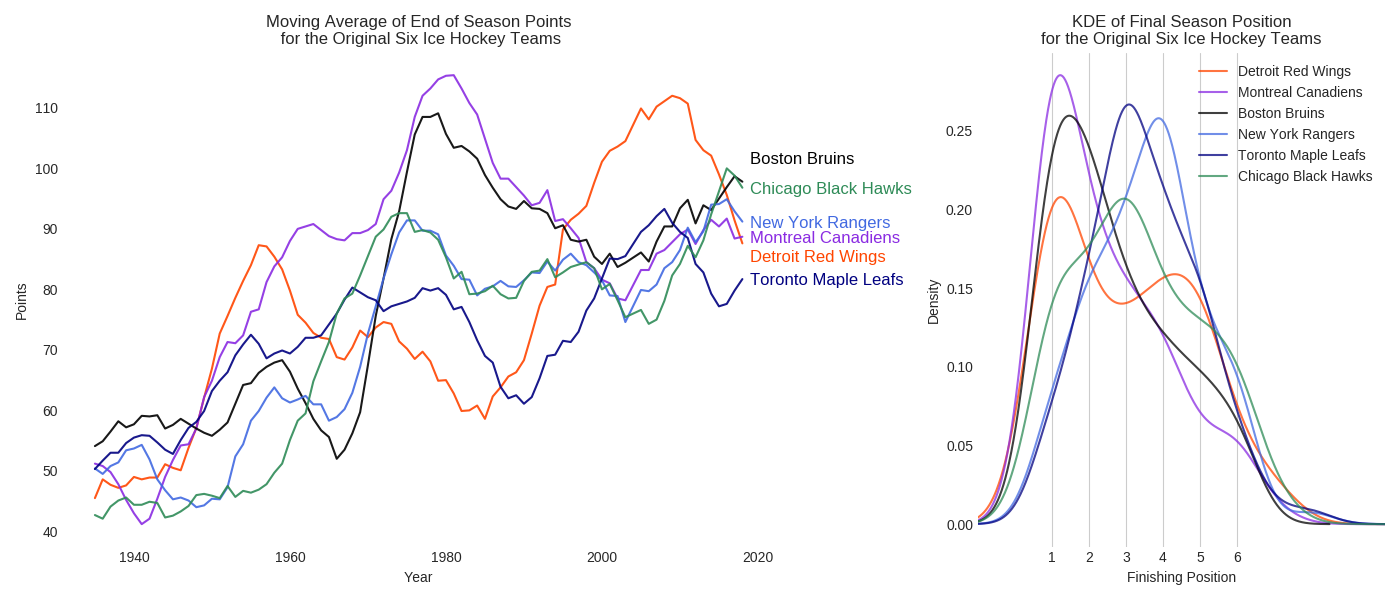

In [14]:
plt.figure(figsize=(14,6))
gspec=mpl.gridspec.GridSpec(1,5)

#SUBPLOT PLOT 1
#Moving Average Plots
plt.subplot(gspec[0,:3])
for name, team in tags.items():
    plt.plot(team[0]['Year'], team[0]['MA'], alpha=0.9, color=team[1])
    #plt.text(team[0]['Year'][-1:],
    #        team[0]['MA'][-1:], 
    #        name, 
    #        fontsize=12,
    #        color=team[1])

plt.ylabel('Points')
plt.xlabel('Year')
plt.title('Moving Average of End of Season Points\n for the Original Six Ice Hockey Teams')


plt.text(detroit_regular['Year'][-1:] + 1,
        detroit_regular['MA'][-1:]-3, 
        'Detroit Red Wings', 
        fontsize=12,
        color='orangered')
plt.text(montreal_regular['Year'][-1:] + 1,
        montreal_regular['MA'][-1:]-1, 
        'Montreal Canadiens', 
        fontsize=12,
        color='blueviolet')
plt.text(boston_regular['Year'][-1:] + 1,
        boston_regular['MA'][-1:]+3, 
        'Boston Bruins', 
        fontsize=12,
        color='black')
plt.text(newyork_regular['Year'][-1:] + 1,
        newyork_regular['MA'][-1:]-1, 
        'New York Rangers', 
        fontsize=12,
        color='royalblue')
plt.text(toronto_regular['Year'][-1:] + 1,
        toronto_regular['MA'][-1:]-1, 
        'Toronto Maple Leafs', 
        fontsize=12,
        color='navy')
plt.text(chicago_regular['Year'][-1:] + 1,
        chicago_regular['MA'][-1:]-1, 
        'Chicago Black Hawks', 
        fontsize=12,
        color='seagreen')

plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)


#SUB PLOT 2
   
plt.subplot(gspec[0,3:])
for name, team in tags.items():
    team[0]['Finish'].plot.kde(alpha=0.75, color=team[1]) 

plt.xticks([1,2,3,4,5,6])
plt.grid(which='major', axis='x', xdata=[1,2,3,4,5,6])
plt.xlabel('Finishing Position')
plt.title('KDE of Final Season Position\nfor the Original Six Ice Hockey Teams')
plt.xlim(-1,10)
plt.legend(tags.keys(), fontsize='medium')
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Results
* Montreal Canadiens have the most first place finishes.
* Montreal, Boston and Detroit have had the most first place finishes.
* New York Toronto and Chicago have generally placed further down the table.
* Detroit Red Wings have had two eras of success in the 50s/early 60s and in the 2000s.

